In [1]:
import seaborn
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2160 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442086046.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 324233 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.138473s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [2]:
athlete_ratings, segment_ratings, model = cm.df_to_latent_features(training_df, 4)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 324233 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.142781s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 4        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [3]:
vm.testing_rmse(model, testing_df)

0.62961702757469595

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,rating_1,rating_2,rating_3,rating_4
seg_average_grade,0.655111,-0.613618,-0.329466,0.104845
seg_distance,0.265832,-0.094016,-0.007125,0.084839
seg_maximum_grade,0.123637,-0.166129,-0.032292,0.016732
rating_1,1.000000,-0.384572,-0.238411,0.036041
rating_2,-0.384572,1.000000,-0.033371,-0.272911
rating_3,-0.238411,-0.033371,1.000000,0.000674
rating_4,0.036041,-0.272911,0.000674,1.000000


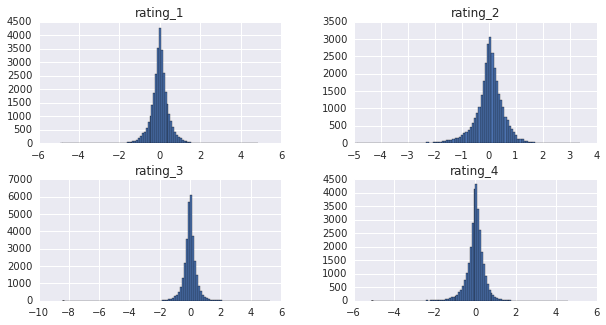

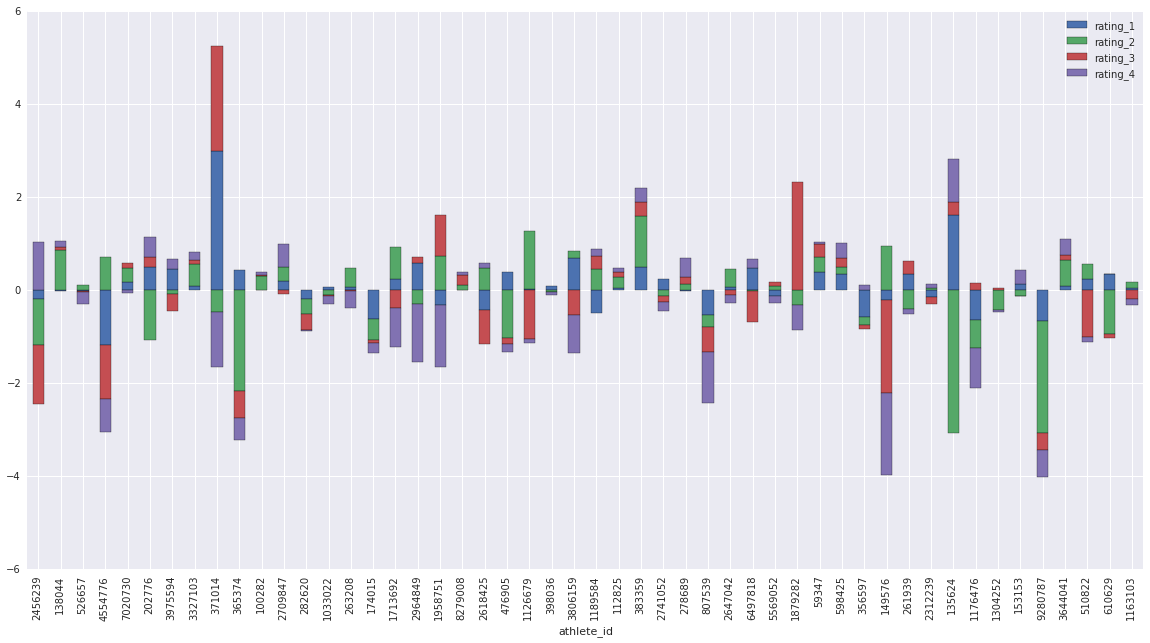

In [5]:
vm.plot_ratings(athlete_ratings)

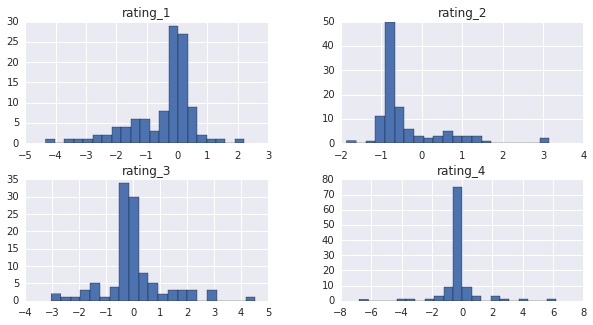

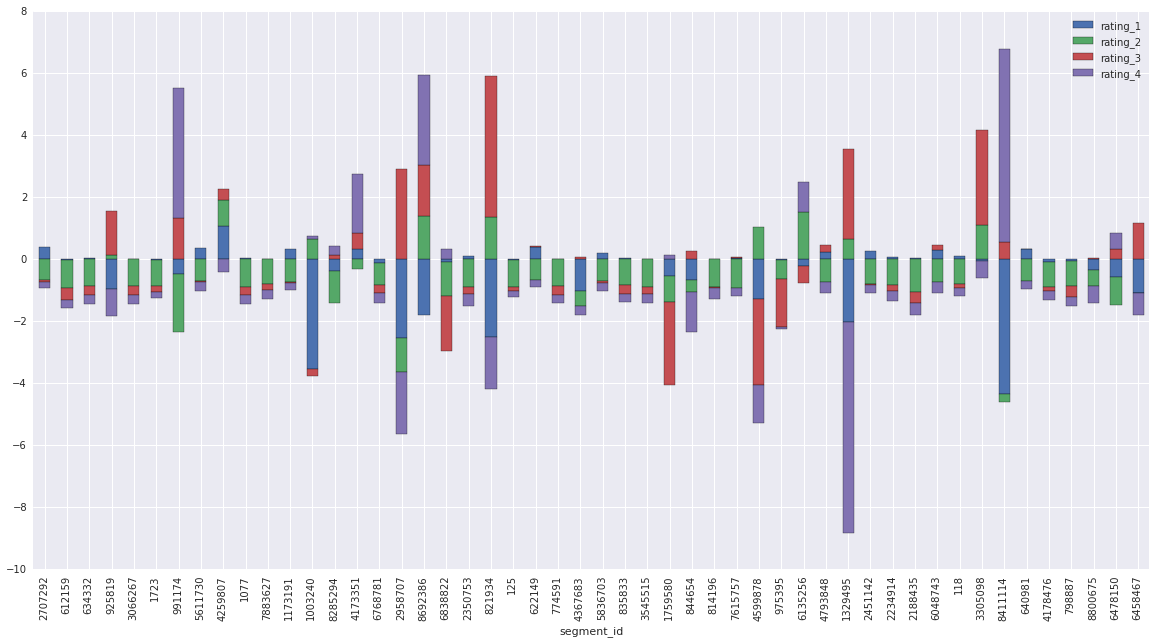

In [6]:
vm.plot_ratings(segment_ratings)

In [11]:
leaderboards = r.get_all_leaderboards(athlete_ratings, file_path='../app/leaderboards.pkl')
leaderboards

[      athlete_id    rating_1
 rank                        
 1        8660938  100.000000
 2        2861297   99.729445
 3        1231754   91.328083
 4        5389992   89.433622
 5            539   89.367272
 6         322318   88.983842
 7         462886   88.334042
 8        5730068   87.142847
 9         724108   84.673475
 10          9192   84.092783
 11         77135   82.991876
 12       2272197   82.619984
 13        550606   81.920209
 14        333349   81.884866
 15        371014   81.154663
 16       1794874   81.080581
 17       3097247   80.934629
 18      10180630   80.886469
 19       3678005   80.351480
 20       2234546   80.280786,       athlete_id    rating_2
 rank                        
 1        4717107  100.000000
 2        6628911   95.962661
 3       10098942   94.712033
 4        1894789   94.124089
 5        2477744   93.203479
 6        2468196   92.443012
 7         341257   89.314606
 8         352330   88.304096
 9         265166   88.170026
 10       

In [10]:
scaled_segment_ratings = r.get_scaled_ratings(segment_ratings)
scaled_segment_ratings.ix[4062646]

rating_1    79.501127
rating_2    27.620129
rating_3    29.899779
rating_4    52.569244
Name: 4062646, dtype: float64